# MadMiner particle physics tutorial

# Part 4a: Limit setting

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

In part 4a of this tutorial we will use the networks trained in step 3a and 3b to calculate the expected limits on our theory parameters.

## 0. Preparations

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals

import six
import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.limits import AsymptoticLimits
from madminer.sampling import SampleAugmenter
from madminer import sampling
from madminer.plotting import plot_histograms


In [10]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        # print("Deactivating logging output for", key)
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Preparations

In the end, what we care about are not plots of the log likelihood ratio, but limits on parameters. But at least under some asymptotic assumptions, these are directly related. MadMiner makes it easy to calculate p-values in the asymptotic limit with the `AsymptoticLimits` class in the `madminer.limits`: 

In [11]:
limits = AsymptoticLimits('data/lhe_data_shuffled.h5')
# limits = AsymptoticLimits('data/delphes_data_shuffled.h5')

03:06 madminer.analysis    INFO    Loading data from data/lhe_data_shuffled.h5
03:06 madminer.analysis    INFO    Found 2 parameters
03:06 madminer.analysis    INFO    Did not find nuisance parameters
03:06 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
03:06 madminer.analysis    INFO    Found 3 observables
03:06 madminer.analysis    INFO    Found 89991 events
03:06 madminer.analysis    INFO      49991 signal events sampled from benchmark sm
03:06 madminer.analysis    INFO      10000 signal events sampled from benchmark w
03:06 madminer.analysis    INFO      10000 signal events sampled from benchmark neg_w
03:06 madminer.analysis    INFO      10000 signal events sampled from benchmark ww
03:06 madminer.analysis    INFO      10000 signal events sampled from benchmark neg_ww
03:06 madminer.analysis    INFO    Found morphing setup with 6 components
03:06 madminer.analysis    INFO    Did not find nuisance morphing setup


This class provids two high-level functions:
- `AsymptoticLimits.observed_limits()` lets us calculate p-values on a parameter grid for some observed events, and
- `AsymptoticLimits.expected_limits()` lets us calculate expected p-values on a parameter grid based on all data in the MadMiner file.

First we have to define the parameter grid on which we evaluate the p-values.

In [12]:
grid_ranges = [(-1, 1.), (-1, 1.)]
grid_resolutions = [25, 25]

What luminosity (in inverse pb) are we talking about?

In [13]:
lumi = 300.*1000. 

## 2. Expected limits based on histogram

First, as a baseline, let us calculate the expected limits based on a simple jet pT histogram. Right now, there are not a lot of option for this function; MadMiner even calculates the binning automatically. (We will add more functionality!)

The keyword `include_xsec` determines whether we include information from the total rate or just use the shapes. Since we don't model backgrounds and systematics in this tutorial, the rate information is unrealistically large, so we leave it out here.

In [19]:
p_values = {}
mle = {}

In [20]:
theta_grid, p_values_expected_histo, best_fit_expected_histo, _, _, (histos, observed, observed_weights) = limits.expected_limits(
    mode="histo",
    hist_vars=["pt_j1"],
    theta_true=[0.,0.],
    grid_ranges=grid_ranges,
    grid_resolutions=grid_resolutions,
    luminosity=lumi,
    include_xsec=False,
    return_asimov=True,
)

p_values["Histogram"] = p_values_expected_histo
mle["Histogram"] = best_fit_expected_histo

03:12 madminer.limits      INFO    Generating Asimov data
03:12 madminer.limits      INFO    Expected events: 303.4579250833741
03:12 madminer.limits      INFO    Calculating p-values for 303.4579250833741 expected events in mode histo without rate information
03:12 madminer.limits      INFO    Evaluating likelihood on a regular grid with 625 parameter points
03:12 madminer.limits      INFO    Setting up standard summary statistics
03:12 madminer.limits      INFO    Creating histograms of 1 summary statistics. Using (25,) bins each, or 25 in total.
03:12 madminer.limits      INFO    Determining fixed adaptive histogram binning for all points on grid
03:12 madminer.analysis    WARNING Requested 100000 events, but only 71993 available
03:12 madminer.analysis    WARNING Requested 100000 events, but only 71993 available
03:12 madminer.limits      INFO    Calculating kinematic log likelihood with histograms
03:12 madminer.limits      INFO    Calculating p-values


With `mode="rate"`, we could calculate limits based on only the rate -- but again, since the rate is extremely powerful when backgrounds and systematics are not taken into account, we don't do that in this tutorial.

Let's visualize the likelihood estimated with these histograms:

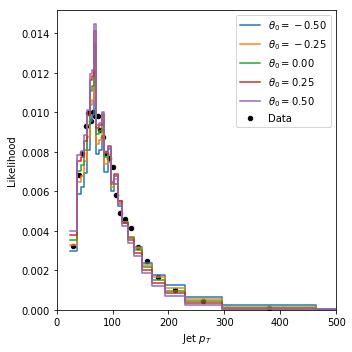

In [21]:
indices = [12 + i * 25 for i in [6,9,12,15,18]]

fig = plot_histograms(
    histos=[histos[i] for i in indices],
    observed=[observed[i] for i in indices],
    observed_weights=observed_weights,
    histo_labels=[r"$\theta_0 = {:.2f}$".format(theta_grid[i,0]) for i in indices],
    xlabel="Jet $p_T$",
    xrange=(0.,500.),
)

plt.show()


## 3. Expected limits based on ratio estimators

Next, `mode="ml"` allows us to calculate limits based on any `ParamterizedRatioEstimator` instance like the ALICES estimator trained above:

In [22]:
theta_grid, p_values_expected_alices, best_fit_expected_alices, _, _, _ = limits.expected_limits(
    mode="ml",
    model_file='models/alices',
    theta_true=[0.,0.],
    grid_ranges=grid_ranges,
    grid_resolutions=grid_resolutions,
    luminosity=lumi,
    include_xsec=False,
)

p_values["ALICES"] = p_values_expected_alices
mle["ALICES"] = best_fit_expected_alices

03:12 madminer.limits      INFO    Generating Asimov data
03:12 madminer.limits      INFO    Expected events: 303.4579250833741
03:12 madminer.limits      INFO    Calculating p-values for 303.4579250833741 expected events in mode ml without rate information
03:12 madminer.limits      INFO    Evaluating likelihood on a regular grid with 625 parameter points
03:12 madminer.limits      INFO    Loading kinematic likelihood ratio estimator
03:12 madminer.ml          INFO    Loading model from models/alices
03:12 madminer.limits      INFO    Calculating kinematic log likelihood ratio with estimator
03:12 madminer.ml          INFO    Loading evaluation data
03:12 madminer.ml          INFO    Starting ratio evaluation for 6259375 x-theta combinations
03:14 madminer.ml          INFO    Evaluation done
03:14 madminer.limits      INFO    Calculating p-values


and the ALICES estimator which only used the observable `pt_j1`

In [23]:
theta_grid, p_values_expected_alices_pt, best_fit_expected_alices_pt, _, _, _ = limits.expected_limits(
    mode="ml",
    model_file='models/alices_pt',
    theta_true=[0.,0.],
    grid_ranges=grid_ranges,
    grid_resolutions=grid_resolutions,
    luminosity=lumi,
    include_xsec=False,
)

p_values["ALICES_pt"] = p_values_expected_alices_pt
mle["ALICES_pt"] = best_fit_expected_alices_pt

03:14 madminer.limits      INFO    Generating Asimov data
03:14 madminer.limits      INFO    Expected events: 303.4579250833741
03:14 madminer.limits      INFO    Calculating p-values for 303.4579250833741 expected events in mode ml without rate information
03:14 madminer.limits      INFO    Evaluating likelihood on a regular grid with 625 parameter points
03:14 madminer.limits      INFO    Loading kinematic likelihood ratio estimator
03:14 madminer.ml          INFO    Loading model from models/alices_pt
03:14 madminer.limits      INFO    Calculating kinematic log likelihood ratio with estimator
03:14 madminer.ml          INFO    Loading evaluation data
03:14 madminer.ml          INFO    Starting ratio evaluation for 6259375 x-theta combinations
03:17 madminer.ml          INFO    Evaluation done
03:17 madminer.limits      INFO    Calculating p-values


## 4. Expected limits based on score estimators

To get p-values from a SALLY estimator, we have to use histograms of the estimated score:

In [26]:
import madminer
madminer.__version__

'0.6.3'

In [33]:
theta_grid, p_values_expected_sally, best_fit_expected_sally, _, _, (histos, observed, observed_weights) = limits.expected_limits(
    mode="sally",
    model_file='models/sally',
    theta_true=[0.,0.],
    grid_ranges=grid_ranges,
    grid_resolutions=grid_resolutions,
    luminosity=lumi,
    include_xsec=False,
    return_asimov=True,
)

p_values["SALLY"] = p_values_expected_sally
mle["SALLY"] = best_fit_expected_sally

03:40 madminer.limits      INFO    Generating Asimov data
03:40 madminer.limits      INFO    Expected events: 303.4579250833741
03:40 madminer.limits      INFO    Calculating p-values for 303.4579250833741 expected events in mode sally without rate information
03:40 madminer.limits      INFO    Evaluating likelihood on a regular grid with 625 parameter points
03:40 madminer.limits      INFO    Loading score estimator and setting all components up as summary statistics
03:40 madminer.ml          INFO    Loading model from models/sally
03:40 madminer.ml          INFO    Starting score evaluation
03:40 madminer.limits      INFO    Creating histograms of 2 summary statistics. Using (8, 8) bins each, or 64 in total.
03:40 madminer.limits      INFO    Determining fixed adaptive histogram binning for all points on grid
03:40 madminer.analysis    WARNING Requested 100000 events, but only 71993 available
03:40 madminer.ml          INFO    Starting score evaluation
03:40 madminer.analysis    WAR

Let's have a look at the underlying 2D histograms:

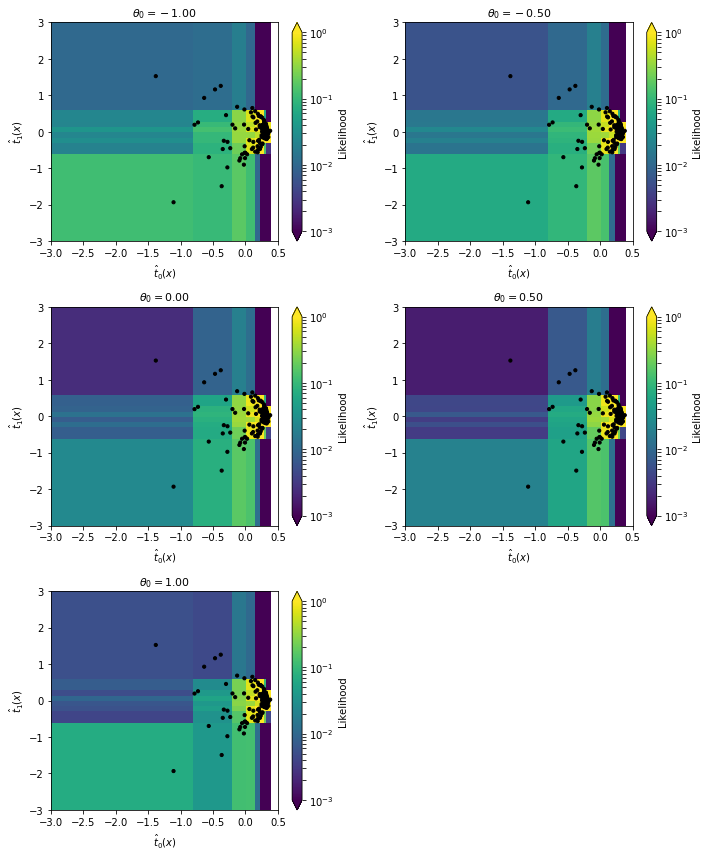

In [40]:
indices = [12 + i * 25 for i in [0,6,12,18,24]]

fig = plot_histograms(
    histos=[histos[i] for i in indices],
    observed=observed[0,:100,:],
    observed_weights=observed_weights[:100],
    histo_labels=[r"$\theta_0 = {:.2f}$".format(theta_grid[i,0]) for i in indices],
    xlabel=r'$\hat{t}_0(x)$',
    ylabel=r'$\hat{t}_1(x)$',
    xrange=(-3.,.5),
    yrange=(-3.,3.),
    log=True,
    zrange=(1.e-3,1.),
    markersize=10.
)
    

## 5. Expected limits based on likelihood estimators

In [41]:
theta_grid, p_values_expected_scandal, best_fit_expected_scandal, _, _, _ = limits.expected_limits(
    mode="ml",
    model_file='models/scandal',
    theta_true=[0.,0.],
    grid_ranges=grid_ranges,
    grid_resolutions=grid_resolutions,
    luminosity=lumi,
    include_xsec=False,
)

p_values["SCANDAL"] = p_values_expected_scandal
mle["SCANDAL"] = best_fit_expected_scandal

05:31 madminer.limits      INFO    Generating Asimov data
05:31 madminer.limits      INFO    Expected events: 303.4579250833741
05:31 madminer.limits      INFO    Calculating p-values for 303.4579250833741 expected events in mode ml without rate information
05:31 madminer.limits      INFO    Evaluating likelihood on a regular grid with 625 parameter points
05:31 madminer.limits      INFO    Loading kinematic likelihood ratio estimator
05:31 madminer.ml          INFO    Loading model from models/scandal
05:31 madminer.limits      INFO    Calculating kinematic log likelihood ratio with estimator
05:31 madminer.ml          INFO    Starting ratio evaluation for 6259375 x-theta combinations
05:34 madminer.ml          INFO    Evaluation done
05:34 madminer.limits      INFO    Calculating p-values


## 6. Toy signal

In addition to these expected limits (based on the SM), let us inject a mock signal. We first generate the data:

In [42]:
sampler = SampleAugmenter('data/lhe_data_shuffled.h5')
x_observed, _, _ = sampler.sample_test(
    theta=sampling.morphing_point([0.5,0.5]),
    n_samples=100,
    folder=None,
    filename=None,
)

05:34 madminer.analysis    INFO    Loading data from data/lhe_data_shuffled.h5
05:34 madminer.analysis    INFO    Found 2 parameters
05:34 madminer.analysis    INFO    Did not find nuisance parameters
05:34 madminer.analysis    INFO    Found 6 benchmarks, of which 6 physical
05:34 madminer.analysis    INFO    Found 3 observables
05:34 madminer.analysis    INFO    Found 89991 events
05:34 madminer.analysis    INFO      49991 signal events sampled from benchmark sm
05:34 madminer.analysis    INFO      10000 signal events sampled from benchmark w
05:34 madminer.analysis    INFO      10000 signal events sampled from benchmark neg_w
05:34 madminer.analysis    INFO      10000 signal events sampled from benchmark ww
05:34 madminer.analysis    INFO      10000 signal events sampled from benchmark neg_ww
05:34 madminer.analysis    INFO    Found morphing setup with 6 components
05:34 madminer.analysis    INFO    Did not find nuisance morphing setup
05:34 madminer.sampling    INFO    Extracting ev

In [43]:
_, p_values_observed, best_fit_observed, _, _, _ = limits.observed_limits(
    x_observed=x_observed,
    mode="ml",
    model_file='models/alices',
    grid_ranges=grid_ranges,
    grid_resolutions=grid_resolutions,
    luminosity=lumi,
    include_xsec=False,
)

p_values["ALICES signal"] = p_values_observed
mle["ALICES signal"] = best_fit_observed

05:34 madminer.limits      INFO    Calculating p-values for 100 expected events in mode ml without rate information
05:34 madminer.limits      INFO    Evaluating likelihood on a regular grid with 625 parameter points
05:34 madminer.limits      INFO    Loading kinematic likelihood ratio estimator
05:34 madminer.ml          INFO    Loading model from models/alices
05:34 madminer.limits      INFO    Calculating kinematic log likelihood ratio with estimator
05:34 madminer.ml          INFO    Loading evaluation data
05:34 madminer.ml          INFO    Starting ratio evaluation for 62500 x-theta combinations
05:34 madminer.ml          INFO    Evaluation done
05:34 madminer.limits      INFO    Calculating p-values


## 7. Plot

Let's plot the results:

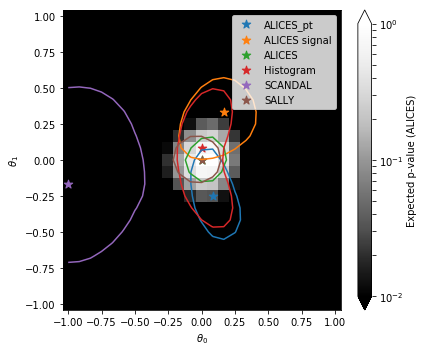

In [44]:
show = "ALICES"

bin_size = (grid_ranges[0][1] - grid_ranges[0][0])/(grid_resolutions[0] - 1)
edges = np.linspace(grid_ranges[0][0] - bin_size/2, grid_ranges[0][1] + bin_size/2, grid_resolutions[0] + 1)
centers = np.linspace(grid_ranges[0][0], grid_ranges[0][1], grid_resolutions[0])

fig = plt.figure(figsize=(6,5))
ax = plt.gca()

cmin, cmax = 1.e-2, 1.

pcm = ax.pcolormesh(
    edges, edges, p_values[show].reshape((grid_resolutions[0], grid_resolutions[1])).T,
    norm=matplotlib.colors.LogNorm(vmin=cmin, vmax=cmax),
    cmap='Greys_r'
)
cbar = fig.colorbar(pcm, ax=ax, extend='both')

for i, (label, p_value) in enumerate(six.iteritems(p_values)):
    plt.contour(
        centers, centers, p_value.reshape((grid_resolutions[0], grid_resolutions[1])).T,
        levels=[0.32],
        linestyles='-', colors='C{}'.format(i)
    )
    plt.scatter(
        theta_grid[mle[label]][0], theta_grid[mle[label]][1],
        s=80., color='C{}'.format(i), marker='*',
        label=label
    )

plt.legend()

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
cbar.set_label('Expected p-value ({})'.format(show))

plt.tight_layout()
plt.show()


### Save results

Let's save the results to later compare them to results obtained in other notebooks. 

In [45]:
np.save("limits/limits.npy", [p_values,mle])